In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
data = pd.read_csv("C:\\Users\\Neeraj\\Downloads\\archive (1).zip")

In [3]:
data.head()

,Year,Country Name,GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
0,1960,India,3.702988e+10,82,0.00,6.83,4.46,6.745366e+08,1.78,445954579,2.31,41.13
1,1961,India,3.923244e+10,85,3.72,5.96,4.30,6.663571e+08,1.70,456351876,2.33,41.74
2,1962,India,4.216148e+10,90,2.93,6.03,4.17,5.127918e+08,3.63,467024193,2.34,42.34
3,1963,India,4.842192e+10,101,5.99,5.91,4.28,6.078625e+08,2.95,477933619,2.34,42.94
4,1964,India,5.648029e+10,116,7.45,5.69,3.73,4.991451e+08,13.36,489059309,2.33,43.57


In [4]:
data.columns

Index(['Year', 'Country Name', 'GDP (current US$) ',
       ' GDP per capita (current US$) ', 'GDP growth (annual %)',
       'Imports of goods and services (% of GDP)',
       'Exports of goods and services (% of GDP)',
       ' Total reserves (includes gold, current US$) ',
       'Inflation, consumer prices (annual %)', 'Population, total',
       'Population growth (annual %)',
       'Life expectancy at birth, total (years)'],
      dtype='object')

In [5]:
data = data.drop("Country Name", axis = 1)

In [6]:
new_columns = {"GDP (current US$) " : "GDP", ' GDP per capita (current US$) ' : "GDP per capita", "GDP growth (annual %)": "GDP growth",
              "Imports of goods and services (% of GDP)" : "Imports", "Exports of goods and services (% of GDP)": "Exports",
              " Total reserves (includes gold, current US$) ": "Total reserves", "Inflation, consumer prices (annual %)": "Inflation",
              "Population, total": "Population","Population growth (annual %)": "Population growth","Life expectancy at birth, total (years)": " Life Expectancy"}
data = data.rename(columns = new_columns)

In [7]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

C:\Users\Neeraj\AppData\Local\Temp\ipykernel_7788\3532507434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downsample_data["GDP"] /= 1e9


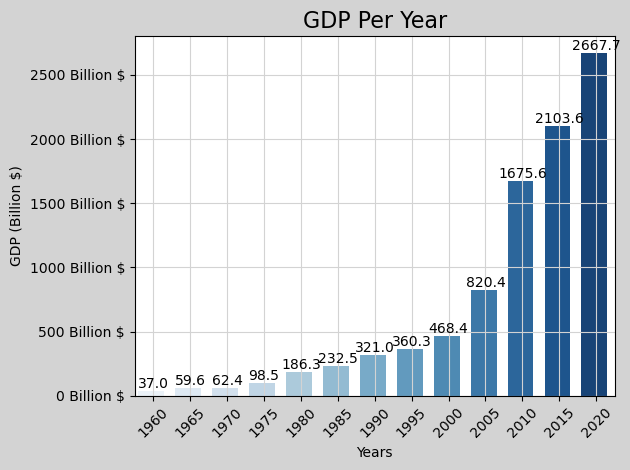

In [8]:
plt.style.use("seaborn-colorblind")
downsample_data = data[data["Year"] % 5 == 0]
downsample_data["GDP"] /= 1e9
ax = sns.barplot(x=downsample_data["Year"], y=downsample_data["GDP"], palette="Blues")
formatter = ticker.StrMethodFormatter("{x:.0f} Billion $")
ax.yaxis.set_major_formatter(formatter)

ax.grid(True, color="lightgray")

bar_width = 0.7
for bar in ax.containers:
    plt.setp(bar, width=bar_width)

for i, value in enumerate(downsample_data["GDP"]):
    ax.text(i, value + 0.1, f"{value:.1f}", ha="center", va="bottom")

fig = plt.gcf()
fig.set_facecolor('lightgray')

plt.xlabel("Years")
plt.ylabel("GDP (Billion $)")
plt.title("GDP Per Year", fontsize=16) 

plt.xticks(rotation=45) 

plt.tight_layout()
plt.savefig("g1.png",dpi=72)
plt.show()

In [9]:
data.head()

,Year,GDP,GDP per capita,GDP growth,Imports,Exports,Total reserves,Inflation,Population,Population growth,Life Expectancy
0,1960,3.702988e+10,82,0.00,6.83,4.46,6.745366e+08,1.78,445954579,2.31,41.13
1,1961,3.923244e+10,85,3.72,5.96,4.30,6.663571e+08,1.70,456351876,2.33,41.74
2,1962,4.216148e+10,90,2.93,6.03,4.17,5.127918e+08,3.63,467024193,2.34,42.34
3,1963,4.842192e+10,101,5.99,5.91,4.28,6.078625e+08,2.95,477933619,2.34,42.94
4,1964,5.648029e+10,116,7.45,5.69,3.73,4.991451e+08,13.36,489059309,2.33,43.57


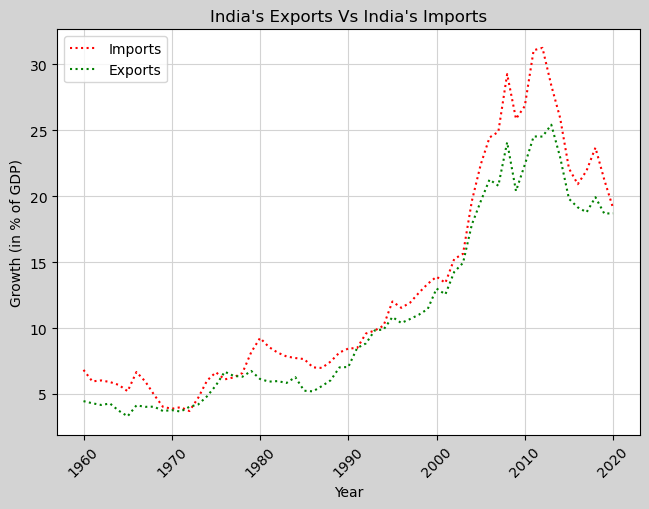

In [10]:
plt.style.use("seaborn-colorblind")
xaxis = data["Imports"]
yaxis = data["Exports"]
x     = data["Year"]
plt.plot(x,xaxis,color = "Red",linestyle = "dotted",label = "Imports")
plt.plot(x,yaxis,color = "Green",linestyle = "dotted",label = "Exports")
plt.grid(True,color = "lightgray")
fig = plt.gcf()
fig.set_facecolor("lightgray")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("Growth (in % of GDP)")
plt.title("India's Exports Vs India's Imports")
plt.legend()
plt.savefig("g2.png",dpi=72)
plt.show()


C:\Users\Neeraj\AppData\Local\Temp\ipykernel_7788\1422624952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downsample_data["Total reserves"] /= 1e9


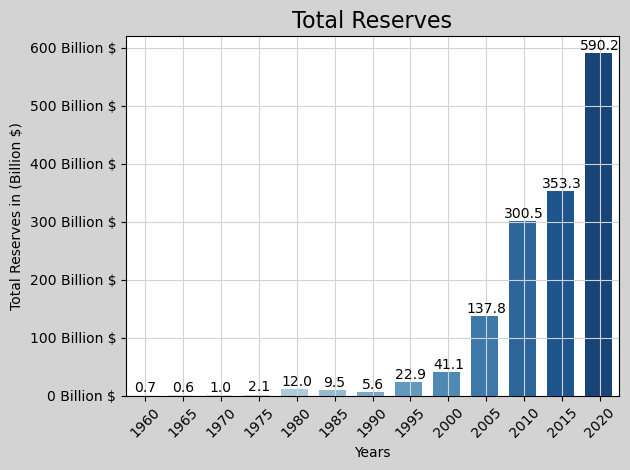

In [11]:
plt.style.use("seaborn-colorblind")
downsample_data = data[data["Year"] % 5 == 0]
downsample_data["Total reserves"] /= 1e9
ax = sns.barplot(x=downsample_data["Year"],y=downsample_data["Total reserves"],palette = "Blues")
formatter = ticker.StrMethodFormatter("{x:.0f} Billion $")
ax.yaxis.set_major_formatter(formatter)

ax.grid(True, color="lightgray")

bar_width = 0.7
for bar in ax.containers:
    plt.setp(bar, width=bar_width)

for i, value in enumerate(downsample_data["Total reserves"]):
    ax.text(i, value + 0.1, f"{value:.1f}", ha="center", va="bottom")

fig = plt.gcf()
fig.set_facecolor('lightgray')

plt.xlabel("Years")
plt.ylabel("Total Reserves in (Billion $)")
plt.title("Total Reserves", fontsize=16)  

plt.xticks(rotation=45)  

plt.tight_layout()
plt.savefig("g3.png",dpi=72)
plt.show()

In [12]:
data.head()

,Year,GDP,GDP per capita,GDP growth,Imports,Exports,Total reserves,Inflation,Population,Population growth,Life Expectancy
0,1960,3.702988e+10,82,0.00,6.83,4.46,6.745366e+08,1.78,445954579,2.31,41.13
1,1961,3.923244e+10,85,3.72,5.96,4.30,6.663571e+08,1.70,456351876,2.33,41.74
2,1962,4.216148e+10,90,2.93,6.03,4.17,5.127918e+08,3.63,467024193,2.34,42.34
3,1963,4.842192e+10,101,5.99,5.91,4.28,6.078625e+08,2.95,477933619,2.34,42.94
4,1964,5.648029e+10,116,7.45,5.69,3.73,4.991451e+08,13.36,489059309,2.33,43.57


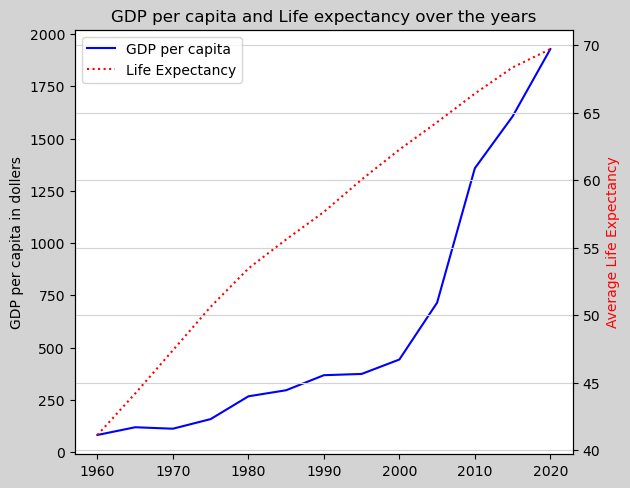

In [13]:

plt.style.use("seaborn-colorblind")
downsample_data = data[data["Year"] % 5 == 0]
x = downsample_data["Year"]
y = downsample_data["GDP per capita"]
z = downsample_data[" Life Expectancy"]
fig,ax1 = plt.subplots()
ax1.plot(x,y,color="Blue",linestyle="solid",label="GDP per capita")
ax1.set_ylabel("GDP per capita in dollers")

ax2 = ax1.twinx()
ax2.plot(x,z,color="Red",linestyle="dotted",label="Life Expectancy")
ax2.set_ylabel("Average Life Expectancy")

plt.grid(True,color='lightgray')
fig = plt.gcf()
fig.set_facecolor("lightgray")
plt.tight_layout()
plt.xticks(rotation=45)
plt.xlabel("Years")
plt.ylabel("Average Life Expectancy",color = "Red")
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)
plt.savefig("g4.png",dpi=72)
plt.title("GDP per capita and Life expectancy over the years")
plt.show()


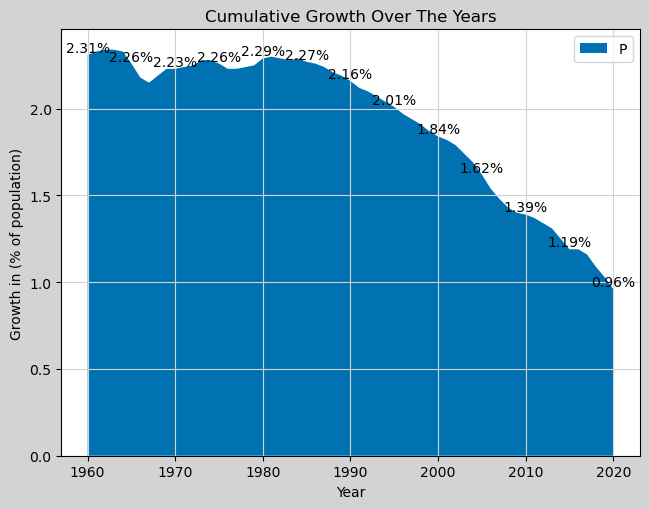

In [14]:
plt.style.use("seaborn-colorblind")
plt.stackplot(data["Year"],data["Population growth"],labels = "Population Growth")
plt.grid(True,color='lightgray')
fig = plt.gcf()
fig.set_facecolor("lightgray")
plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("Growth in (% of population)")
plt.title("Cumulative Growth Over The Years")
plt.legend(loc = "upper right")
step = 5
x_labels = data["Year"].tolist()
y_values = data["Population growth"].tolist()

for i in range(0, len(x_labels), step):
    plt.text(x_labels[i], y_values[i], f"{y_values[i]}%", ha="center", va="bottom")

plt.savefig("g5.png",dpi=72)
plt.show()

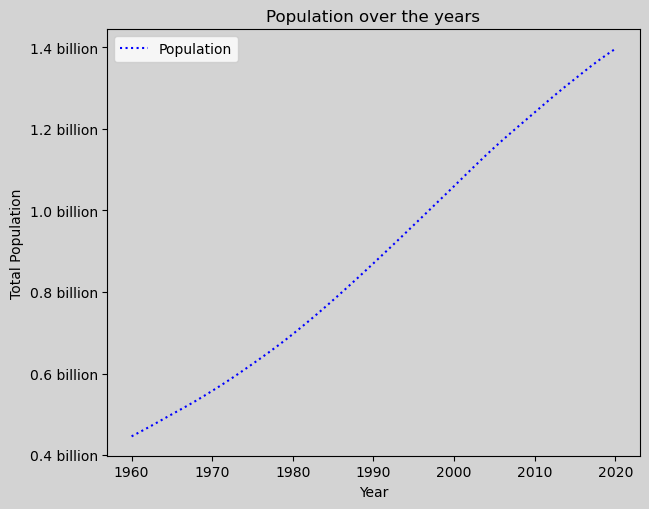

In [15]:
plt.style.use("seaborn-colorblind")
x = data["Year"]
y = data["Population"]
data["Population"] /= 1e9
plt.plot(x,y,linestyle = "dotted", color = "blue",label="Population")
fig = plt.gca()
fig.set_facecolor("lightgray")
plt.grid(True,color="lightgray")
fig = plt.gcf()
fig.set_facecolor("lightgray")
formatter = ticker.FuncFormatter(lambda x, pos: f"{x:.1f} billion")
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.title("Population over the years")
plt.legend()
plt.savefig("g6.png",dpi=72)
plt.show()